# 加载数据集

In [1]:
import cv2
import numpy as np
import torch
import torchvision
from kan import *
import matplotlib.pyplot as plt

train_data = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=None)
test_data = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=None)

def preprocess_data(data):
    images = []
    labels = []
    for img, label in data:
        img = np.array(img)
        img = cv2.resize(img, (7, 7))
        img = img.flatten() / 255.0
        images.append(img)
        labels.append(label)
    return np.array(images), np.array(labels)

train_images, train_labels = preprocess_data(train_data)
test_images, test_labels = preprocess_data(test_data)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using {device} device")

dataset = {
    "train_input": torch.from_numpy(train_images).float().to(device),
    "train_label": torch.from_numpy(train_labels).long().to(device),
    "test_input": torch.from_numpy(test_images).float().to("cpu"),
    "test_label": torch.from_numpy(test_labels).long().to("cpu"),
}

E:\anaconda3\envs\pykan\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] 找不到指定的程序。'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Using cuda device


# 训练

In [7]:
def create_kan():
    return KAN(width=[7*7, 64, 10], grid=4, k=2)
model = create_kan()

def test_acc():
    with torch.no_grad():
        predictions = torch.argmax(model(dataset["test_input"]), dim=1)
        correct = (predictions == dataset["test_label"]).float()
        accuracy = correct.mean()
    return accuracy

def train_acc():
    with torch.no_grad():
        predictions = torch.argmax(model(dataset["train_input"].to('cpu')), dim=1)
        correct = (predictions == dataset["train_label"].to('cpu')).float()
        accuracy = correct.mean()
    return accuracy

results = model.train(
    dataset,
    opt="LBFGS",
    steps=20,
    batch=64,
    loss_fn=torch.nn.CrossEntropyLoss(),
    # metrics=(train_acc, test_acc),
)

train loss: 6.64e-03 | test loss: 1.91e+00 | reg: 2.26e+03 : 100%|██| 20/20 [07:45<00:00, 23.27s/it]


In [8]:
torch.save(model.state_dict(), "./models/kan.pth")

Test accuracy: 69.26%
total number of parameters: 71818


KeyError: 'train_acc'

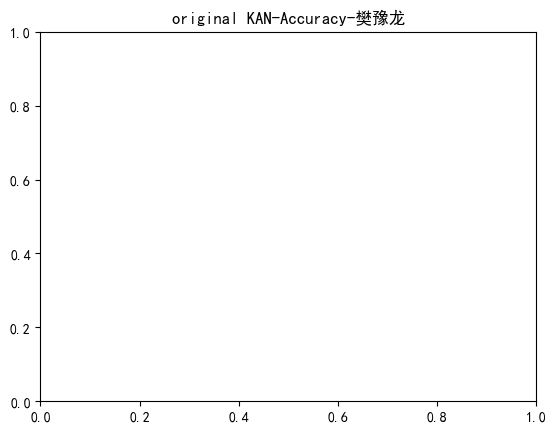

In [9]:
model = create_kan()
model.load_state_dict(torch.load("./models/kan.pth"))
acc = test_acc()
print(f"Test accuracy: {acc.item() * 100:.2f}%")
total_params = sum(p.numel() for p in model.parameters())
print(f"total number of parameters: {total_params}")
plt.rcParams['font.family'] = 'SimHei'
plt.title('original KAN-Accuracy-樊豫龙')
plt.plot(results["train_acc"], label="train")
plt.plot(results["test_acc"], label="test")
plt.show()

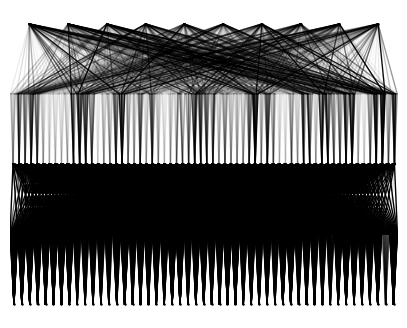

In [9]:
model.plot()

In [15]:
model.symbolic_formula()

make sure all activations need to be converted to symbolic formulas first!
